In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

C:\Users\82109\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
import os
os.chdir('C:/Users/82109/Dropbox/내 PC (DESKTOP-NND5VU7)/Desktop/bigcon')

In [12]:
plt.rcParams['font.family'] = 'NanumGothic'

In [4]:
df = pd.read_excel('All data.xlsx')

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35378 entries, 0 to 35377
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   상품군           35378 non-null  object 
 1   상품소분류         35378 non-null  object 
 2   브랜드명          35378 non-null  object 
 3   판매단가          35378 non-null  int64  
 4   취급액           35378 non-null  int64  
 5   판매수량          35378 non-null  float64
 6   방송시간대         35378 non-null  int64  
 7   방송분대          35378 non-null  int64  
 8   요일            35378 non-null  object 
 9   노출시간          35378 non-null  int64  
 10  최대시청률         35378 non-null  float64
 11  조기마감여부        35378 non-null  int64  
 12  월             35378 non-null  int64  
 13  계절            35378 non-null  object 
 14  시간대           35378 non-null  object 
 15  판매수량시간등급수능    35378 non-null  object 
 16  판매수량시간등급사분위수  35378 non-null  object 
 17  노출빈도여부        35378 non-null  int64  
 18  디테일여부         35378 non-nu

In [149]:
df.head()

,상품군,상품소분류,브랜드명,판매단가,취급액,판매수량,방송시간대,방송분대,요일,노출시간,...,월,계절,시간대,판매수량시간등급수능,판매수량시간등급사분위수,노출빈도여부,디테일여부,평균기온,단가_cluster,판매단가_Range
0,의류,상의,테이트,39900,2099000,52.606516,6,0,화요일,20,...,1,겨울,오전,B,B,0,0,-3.70,0,1
1,의류,상의,테이트,39900,4371000,109.548872,6,0,화요일,20,...,1,겨울,오전,B,B,0,0,-3.70,0,1
2,의류,상의,테이트,39900,3262000,81.754386,6,20,화요일,20,...,1,겨울,오전,B,B,0,0,-3.71,0,1
3,의류,상의,테이트,39900,6955000,174.310777,6,20,화요일,20,...,1,겨울,오전,B,B,0,0,-3.71,0,1
4,의류,상의,테이트,39900,6672000,167.218045,6,40,화요일,20,...,1,겨울,오전,B,B,0,1,-3.71,0,1


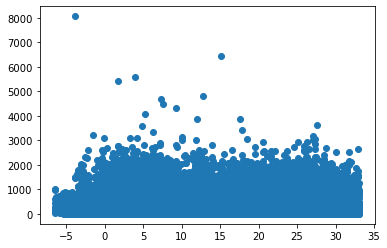

In [161]:
plt.scatter(df['평균기온'],df['판매수량'])

<AxesSubplot:xlabel='평균기온'>

C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44512 missing from cur

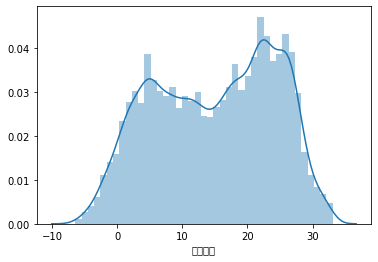

In [162]:
sns.distplot(df['평균기온'])

<AxesSubplot:xlabel='판매수량'>

C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47588 missing from cur

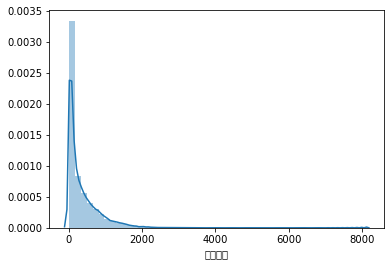

In [172]:
sns.distplot(df['판매수량'])

In [74]:
cl = df[['판매단가']]
cl.shape

(35378, 1)

In [75]:
cl.describe()

,판매단가
count,3.537800e+04
mean,3.878541e+05
std,6.264218e+05
min,1.280000e+04
25%,5.900000e+04
50%,9.900000e+04
75%,3.990000e+05
max,7.930000e+06


In [41]:
cl['단가_scale'] = (cl['판매단가'] - min(cl['판매단가']))/(max(cl['판매단가']) - min(cl['판매단가']))

<ipython-input-41-aeb7fd9c6d6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl['단가_scale'] = (cl['판매단가'] - min(cl['판매단가']))/(max(cl['판매단가']) - min(cl['판매단가']))


In [45]:
cl['취급액_scale'] = (cl['취급액'] - min(cl['취급액']))/(max(cl['취급액']) - min(cl['취급액']))

<ipython-input-45-26c4cccd4d51>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl['취급액_scale'] = (cl['취급액'] - min(cl['취급액']))/(max(cl['취급액']) - min(cl['취급액']))


In [66]:
sc = StandardScaler()

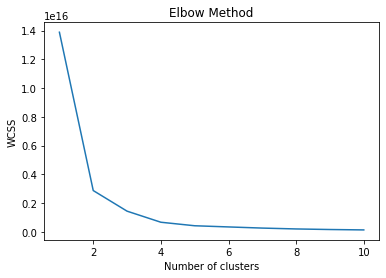

In [76]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(cl)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [142]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(cl)

In [143]:
df['단가_cluster'] = pred_y

In [126]:
min(df['판매단가'][df['단가_cluster'] == 1])

1059000

In [144]:
df.groupby('단가_cluster')['취급액'].mean()

단가_cluster
0    2.836517e+07
1    1.906573e+07
2    1.629172e+07
3    1.551886e+07
4    1.680905e+07
5    1.638953e+07
Name: 취급액, dtype: float64

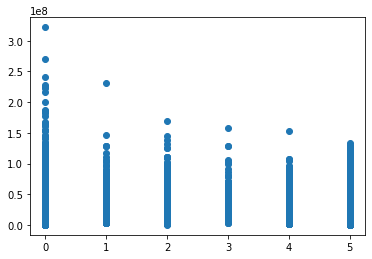

In [145]:
plt.scatter(df['단가_cluster'], df['취급액'])

In [115]:
df['판매단가'].describe()

count    3.537800e+04
mean     3.878541e+05
std      6.264218e+05
min      1.280000e+04
25%      5.900000e+04
50%      9.900000e+04
75%      3.990000e+05
max      7.930000e+06
Name: 판매단가, dtype: float64

In [41]:
conditionlist = [
    (df['판매단가'] <= 59000) ,
    (df['판매단가'] > 59000) & (df['판매단가'] <=99000),
    (df['판매단가'] > 99000) & (df['판매단가'] <=399000),
    (df['판매단가'] > 399000)]
choicelist = ['1','2','3','4']
df['판매단가_Range'] = np.select(conditionlist, choicelist, default='Not Specified')

In [38]:
df = df.astype({'판매단가_Range': 'int'})

In [42]:
df

,상품군,상품소분류,브랜드명,판매단가,취급액,판매수량,방송시간대,방송분대,요일,노출시간,...,조기마감여부,월,계절,시간대,판매수량시간등급수능,판매수량시간등급사분위수,노출빈도여부,디테일여부,평균기온,판매단가_Range
0,의류,상의,테이트,39900,2099000,52.606516,6,0,화요일,20,...,0,1,겨울,오전,B,B,0,0,-3.70,1
1,의류,상의,테이트,39900,4371000,109.548872,6,0,화요일,20,...,0,1,겨울,오전,B,B,0,0,-3.70,1
2,의류,상의,테이트,39900,3262000,81.754386,6,20,화요일,20,...,0,1,겨울,오전,B,B,0,0,-3.71,1
3,의류,상의,테이트,39900,6955000,174.310777,6,20,화요일,20,...,0,1,겨울,오전,B,B,0,0,-3.71,1
4,의류,상의,테이트,39900,6672000,167.218045,6,40,화요일,20,...,0,1,겨울,오전,B,B,0,1,-3.71,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35373,주방,밥솥,쿠첸,148000,1664000,11.243243,23,20,화요일,20,...,0,12,겨울,저녁,C,C,0,0,-4.94,3
35374,주방,밥솥,쿠첸,178000,9149000,51.398876,23,40,화요일,20,...,0,12,겨울,저녁,C,C,0,1,-4.94,3
35375,주방,밥솥,쿠첸,158000,2328000,14.734177,23,40,화요일,20,...,0,12,겨울,저녁,C,C,0,1,-4.94,3
35376,주방,밥솥,쿠첸,168000,15282000,90.964286,23,40,화요일,20,...,0,12,겨울,저녁,C,C,0,1,-4.94,3


In [6]:
df.columns

Index(['상품군', '상품소분류', '브랜드명', '판매단가', '취급액', '판매수량', '방송시간대', '방송분대', '요일',
       '노출시간', '최대시청률', '조기마감여부', '월', '계절', '시간대', '판매수량시간등급수능',
       '판매수량시간등급사분위수', '노출빈도여부', '디테일여부', '평균기온'],
      dtype='object')

In [8]:
df['최대시청률'].describe()

count    35378.000000
mean         0.017881
std          0.023141
min          0.000000
25%          0.000000
50%          0.014000
75%          0.027000
max          0.812000
Name: 최대시청률, dtype: float64

<AxesSubplot:xlabel='최대시청률'>

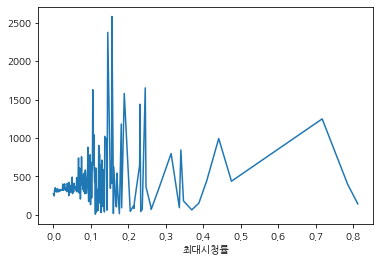

In [14]:
df.groupby('최대시청률')['판매수량'].mean().plot()

In [18]:
df.groupby('상품군')['최대시청률'].mean()

상품군
가구      0.017560
가전      0.015972
건강기능    0.012738
농수축     0.021056
생활용품    0.018031
속옷      0.015784
의류      0.017720
이미용     0.014680
잡화      0.023132
주방      0.017642
침구      0.013569
Name: 최대시청률, dtype: float64

In [19]:
df.groupby('상품소분류')['최대시청률'].mean()

상품소분류
TV       0.017659
가구세트     0.055154
가스레인지    0.011242
건강기능     0.012738
건조기      0.012737
           ...   
테이블      0.023667
프라이어     0.029351
하의       0.017552
핸드백      0.024641
행주       0.008368
Name: 최대시청률, Length: 79, dtype: float64

In [22]:
df['상품소분류'].value_counts()

밥솥      2977
TV      2290
아우터     2202
수산      2035
여성속옷    1627
        ... 
양산        12
공구        10
스타일러       7
낚시용품       6
식기         1
Name: 상품소분류, Length: 79, dtype: int64

<AxesSubplot:xlabel='상품소분류'>

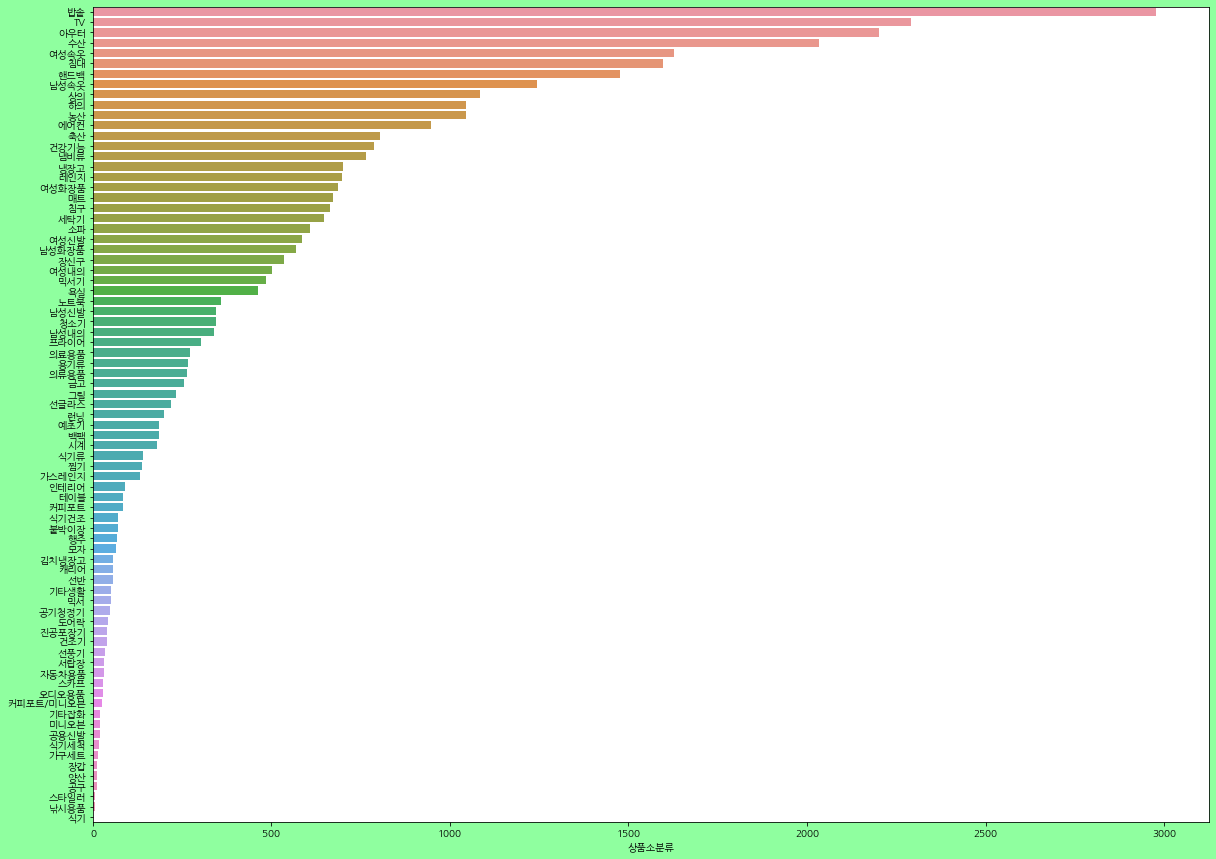

In [20]:
# 상품 소분류별 등장 빈도수
fig = plt.figure(figsize=(20, 15))
fig.patch.set_facecolor('xkcd:mint green')
sns.barplot(y=df['상품소분류'].value_counts().index,x=df['상품소분류'].value_counts())
#plt.tight_layout()

<AxesSubplot:xlabel='월', ylabel='count'>

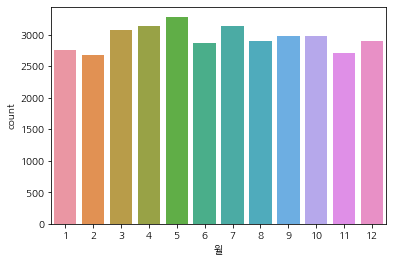

In [28]:
sns.countplot(df['월'])

<AxesSubplot:xlabel='상품군', ylabel='최대시청률'>

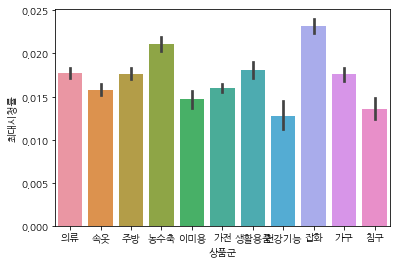

In [30]:
sns.barplot(x = '상품군', y = '최대시청률',data = df)

In [32]:
df.columns

Index(['상품군', '상품소분류', '브랜드명', '판매단가', '취급액', '판매수량', '방송시간대', '방송분대', '요일',
       '노출시간', '최대시청률', '조기마감여부', '월', '계절', '시간대', '판매수량시간등급수능',
       '판매수량시간등급사분위수', '노출빈도여부', '디테일여부', '평균기온'],
      dtype='object')

<AxesSubplot:xlabel='방송시간대', ylabel='판매수량'>

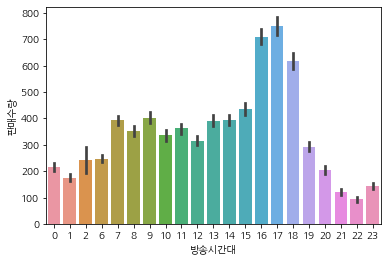

In [33]:
sns.barplot(data = df, x = '방송시간대', y = '판매수량')

<AxesSubplot:xlabel='방송시간대', ylabel='최대시청률'>

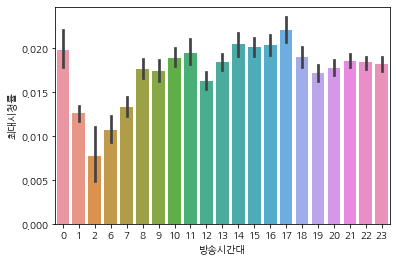

In [34]:
sns.barplot(data = df, x = '방송시간대', y = '최대시청률')

<AxesSubplot:xlabel='요일', ylabel='최대시청률'>

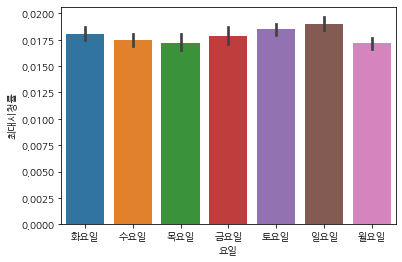

In [48]:
sns.barplot(data = df, x = '요일', y = '최대시청률')

In [47]:
df.groupby('판매단가_Range')['판매수량'].mean()

판매단가_Range
1    745.598753
2    342.225080
3    126.042722
4     18.723631
Name: 판매수량, dtype: float64

<AxesSubplot:xlabel='판매단가_Range', ylabel='판매수량'>

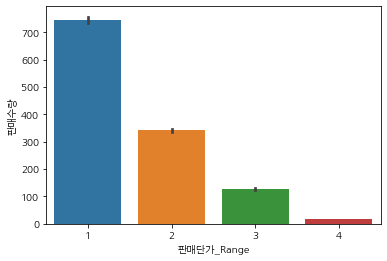

In [46]:
sns.barplot(data = df, x= '판매단가_Range', y = '판매수량')

In [64]:
df['상품군'].value_counts()

주방      6567
가전      5163
의류      4331
속옷      3910
농수축     3884
잡화      3695
생활용품    2771
가구      2302
이미용     1305
건강기능     786
침구       664
Name: 상품군, dtype: int64

In [51]:
df['최대시청률'].describe()

count    35378.000000
mean         0.017881
std          0.023141
min          0.000000
25%          0.000000
50%          0.014000
75%          0.027000
max          0.812000
Name: 최대시청률, dtype: float64

In [60]:
df_drop = df[df['최대시청률']==0].index
df_droped = df.drop(df_drop)
df_droped

,상품군,상품소분류,브랜드명,판매단가,취급액,판매수량,방송시간대,방송분대,요일,노출시간,...,조기마감여부,월,계절,시간대,판매수량시간등급수능,판매수량시간등급사분위수,노출빈도여부,디테일여부,평균기온,판매단가_Range
11,의류,하의,CERINI,59900,53542000,893.856427,8,40,화요일,20,...,0,1,겨울,오전,B,B,0,1,-3.230,2
13,의류,아우터,보코,79000,25628000,324.405063,9,20,화요일,20,...,0,1,겨울,오전,B,A,0,0,-2.090,2
14,의류,아우터,보코,79000,49270000,623.670886,9,40,화요일,20,...,0,1,겨울,오전,B,A,0,1,-2.090,2
15,의류,상의,CERINI,79900,48799000,610.750939,10,0,화요일,20,...,0,1,겨울,오전,B,A,0,0,-1.430,2
16,의류,상의,CERINI,79900,97907000,1225.369212,10,20,화요일,20,...,0,1,겨울,오전,B,A,0,0,-0.795,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35369,가전,냉장고,LG,1359000,72733000,53.519500,22,0,화요일,20,...,0,12,겨울,저녁,C,C,1,1,-4.790,4
35374,주방,밥솥,쿠첸,178000,9149000,51.398876,23,40,화요일,20,...,0,12,겨울,저녁,C,C,0,1,-4.940,3
35375,주방,밥솥,쿠첸,158000,2328000,14.734177,23,40,화요일,20,...,0,12,겨울,저녁,C,C,0,1,-4.940,3
35376,주방,밥솥,쿠첸,168000,15282000,90.964286,23,40,화요일,20,...,0,12,겨울,저녁,C,C,0,1,-4.940,3


In [61]:
df_droped['최대시청률'].describe()

count    24000.000000
mean         0.026359
std          0.023790
min          0.002000
25%          0.013000
50%          0.021000
75%          0.034000
max          0.812000
Name: 최대시청률, dtype: float64

In [71]:
df['최대시청률'].describe()

count    35378.000000
mean         0.017881
std          0.023141
min          0.000000
25%          0.000000
50%          0.014000
75%          0.027000
max          0.812000
Name: 최대시청률, dtype: float64

In [152]:
df.to_csv('df.csv',index = False)